In [1]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense,Flatten, Dropout,BatchNormalization, GlobalAveragePooling2D, ZeroPadding2D
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.optimizers import Adam, SGD 
import pandas as pd
import cv2 as cv2
import numpy as np 
from matplotlib import pyplot as plt 
import os 
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
dataset = r"/home/sachin269/Downloads/ChestXRay/chest_xray/train"
Normal_path = r"/home/sachin269/Downloads/ChestXRay/chest_xray/train/NORMAL"
Pneumonia_path = r"/home/sachin269/Downloads/ChestXRay/chest_xray/train/PNEUMONIA/"

(1858, 2090, 3)


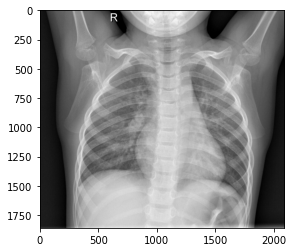

In [3]:
img = cv2.imread(Normal_path+'/IM-0115-0001.jpeg')
print(img.shape)
plt.imshow(img)

In [4]:
vals = [Normal_path, Pneumonia_path]
print(os.listdir(vals[0]).__len__())
print(os.listdir(vals[1]).__len__())

1349
3884


In [5]:
pathdir = [Normal_path, Pneumonia_path]
classes = ['Normal', 'Pneumonia']
filepaths = []
labels = []
for i, j in zip(pathdir, classes):
    filelist = os.listdir(i)
    print(filelist)
    for vals in filelist:
        x = os.path.join(i, vals)
        filepaths.append(x)
        labels.append(j)
print(filepaths.__len__(), labels.__len__())

['NORMAL2-IM-0395-0001-0002.jpeg', 'NORMAL2-IM-1188-0001.jpeg', 'IM-0273-0001.jpeg', 'NORMAL2-IM-1256-0001.jpeg', 'IM-0467-0001-0002.jpeg', 'IM-0660-0001-0002.jpeg', 'NORMAL2-IM-0832-0001.jpeg', 'NORMAL2-IM-0662-0001.jpeg', 'IM-0137-0001.jpeg', 'NORMAL2-IM-0746-0001.jpeg', 'NORMAL2-IM-1038-0001.jpeg', 'IM-0553-0001-0002.jpeg', 'IM-0608-0001.jpeg', 'NORMAL2-IM-0587-0001-0001.jpeg', 'NORMAL2-IM-1209-0001.jpeg', 'IM-0264-0001.jpeg', 'NORMAL2-IM-0539-0001.jpeg', 'NORMAL2-IM-0700-0001.jpeg', 'IM-0355-0001.jpeg', 'NORMAL2-IM-0445-0001.jpeg', 'IM-0701-0001.jpeg', 'IM-0580-0001.jpeg', 'NORMAL2-IM-1277-0001-0002.jpeg', 'IM-0228-0001.jpeg', 'NORMAL2-IM-0907-0001.jpeg', 'NORMAL2-IM-1266-0001.jpeg', 'IM-0724-0001.jpeg', 'IM-0529-0001.jpeg', 'NORMAL2-IM-0447-0001.jpeg', 'NORMAL2-IM-0568-0001.jpeg', 'NORMAL2-IM-0489-0001.jpeg', 'NORMAL2-IM-1163-0001.jpeg', 'NORMAL2-IM-1112-0001.jpeg', 'NORMAL2-IM-0935-0001.jpeg', 'IM-0492-0001.jpeg', 'NORMAL2-IM-1047-0001.jpeg', 'NORMAL2-IM-1108-0001.jpeg', 'NORMAL2

In [6]:
print(filepaths[0:4])
print(labels[0:4])

print(filepaths[-4:])
print(labels[-4:])

['/home/sachin269/Downloads/ChestXRay/chest_xray/train/NORMAL/NORMAL2-IM-0395-0001-0002.jpeg', '/home/sachin269/Downloads/ChestXRay/chest_xray/train/NORMAL/NORMAL2-IM-1188-0001.jpeg', '/home/sachin269/Downloads/ChestXRay/chest_xray/train/NORMAL/IM-0273-0001.jpeg', '/home/sachin269/Downloads/ChestXRay/chest_xray/train/NORMAL/NORMAL2-IM-1256-0001.jpeg']
['Normal', 'Normal', 'Normal', 'Normal']
['/home/sachin269/Downloads/ChestXRay/chest_xray/train/PNEUMONIA/person1451_virus_2480.jpeg', '/home/sachin269/Downloads/ChestXRay/chest_xray/train/PNEUMONIA/person543_virus_1073.jpeg', '/home/sachin269/Downloads/ChestXRay/chest_xray/train/PNEUMONIA/person348_virus_715.jpeg', '/home/sachin269/Downloads/ChestXRay/chest_xray/train/PNEUMONIA/person1517_bacteria_3968.jpeg']
['Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia']


In [7]:
dataset = list(zip(filepaths, labels))
pathframe = pd.DataFrame(dataset, columns=['filepaths', 'labels'])

In [8]:
pathframe.__len__()
pathframe.tail()

,filepaths,labels
5228,/home/sachin269/Downloads/ChestXRay/chest_xray...,Pneumonia
5229,/home/sachin269/Downloads/ChestXRay/chest_xray...,Pneumonia
5230,/home/sachin269/Downloads/ChestXRay/chest_xray...,Pneumonia
5231,/home/sachin269/Downloads/ChestXRay/chest_xray...,Pneumonia
5232,/home/sachin269/Downloads/ChestXRay/chest_xray...,Pneumonia


In [9]:
print(pathframe['labels'].value_counts())

Pneumonia    3884
Normal       1349
Name: labels, dtype: int64


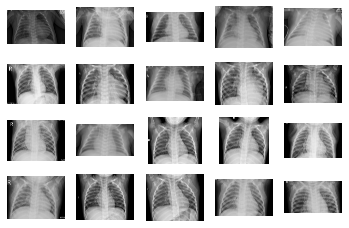

In [10]:
for i in range(0, 20):
    vals = np.random.randint(1, len(pathframe))
    plt.subplot(4,5, i+1)
    plt.imshow(cv2.imread(pathframe.filepaths[vals]))
    plt.axis('off')
plt.show()

In [11]:
Train, Test = train_test_split(pathframe, train_size=0.90, random_state=0)
Train_new, valid = train_test_split(Train, train_size = 0.90, random_state=0)
print(Train.shape, Test.shape, Train_new.shape, valid.shape)

(4709, 2) (524, 2) (4238, 2) (471, 2)


In [12]:
train_datagen = ImageDataGenerator(rescale=1.0/255, rotation_range= 40 , width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                  zoom_range=0.2, horizontal_flip = True, vertical_flip= True)
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [13]:
train_gen = train_datagen.flow_from_dataframe(dataframe = Train_new, x_col = 'filepaths', y_col='labels', batch_size=16, 
                                             target_size=(250,250), class_mode = 'binary', shuffle=True)

valid_gen = train_datagen.flow_from_dataframe(dataframe = valid, x_col = 'filepaths', y_col='labels', batch_size=16, 
                                             target_size=(250,250), class_mode = 'binary', shuffle=True)
test_gen = train_datagen.flow_from_dataframe(dataframe = Test, x_col = 'filepaths', y_col='labels', batch_size=16, 
                                             target_size=(250,250), class_mode = 'binary', shuffle=False)

Found 4237 validated image filenames belonging to 2 classes.
Found 471 validated image filenames belonging to 2 classes.
Found 524 validated image filenames belonging to 2 classes.


/home/sachin269/anaconda3/lib/python3.8/site-packages/keras_preprocessing/image/dataframe_iterator.py:279: UserWarning: Found 1 invalid image filename(s) in x_col="filepaths". These filename(s) will be ignored.
  warnings.warn(


{'Normal': 0, 'Pneumonia': 1}
(16, 250, 250, 3)


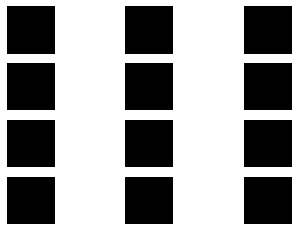

In [14]:
print(train_gen.class_indices)
print(train_gen[0][0].shape)

for i in range(0, 12):
    val = train_gen[0][0][i]
    vals = val.astype('uint8')
    plt.subplot(4,3,i+1)
    plt.imshow(vals)
    plt.axis('off')
plt.show()

In [15]:
model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape = (250, 250, 3), activation = 'relu'))
model.add(Dropout(0.2))

model.add(Conv2D(16, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(16, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience = 2, min_delta= 0.01)

optim=tf.keras.optimizers.RMSprop(learning_rate=0.01, rho=0.9, epsilon=None, decay=0.0)
model.compile(optimizer = optim, loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(train_gen, validation_data= valid_gen, epochs=5)

model.summary()

Epoch 1/5
265/265 [==============================] - 258s 968ms/step - loss: 7.7816 - accuracy: 0.7312 - val_loss: 0.5598 - val_accuracy: 0.7367
Epoch 2/5
265/265 [==============================] - 256s 964ms/step - loss: 0.6208 - accuracy: 0.7420 - val_loss: 0.4430 - val_accuracy: 0.7367
Epoch 3/5
265/265 [==============================] - 247s 930ms/step - loss: 1.1273 - accuracy: 0.7446 - val_loss: 0.4438 - val_accuracy: 0.7367
Epoch 4/5
265/265 [==============================] - 257s 970ms/step - loss: 0.5135 - accuracy: 0.7607 - val_loss: 0.8463 - val_accuracy: 0.7367
Epoch 5/5
265/265 [==============================] - 267s 1s/step - loss: 0.9553 - accuracy: 0.7350 - val_loss: 0.5916 - val_accuracy: 0.7367
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 16)      448       
                                                            

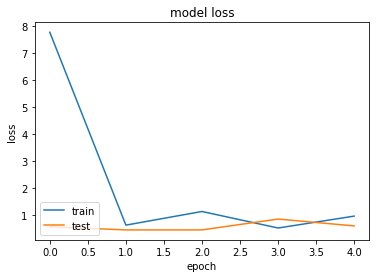

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower left')
plt.show()

In [17]:
model.evaluate(test_gen)

33/33 [==============================] - 14s 416ms/step - loss: 0.5948 - accuracy: 0.7309


[0.5948159694671631, 0.7309160232543945]

Text(0.5, 0, 'Hidden Layer 3 ')

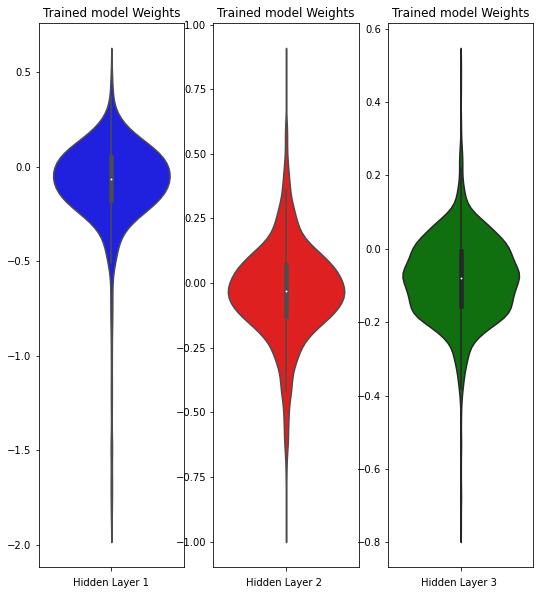

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
#Violin Plots for all the weights matrices.
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure(figsize=(12,10))
plt.title("Weight matrices after model is trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')